# Proyecto Software 3

Enlace al repositorio: https://github.com/Zamir2211888/Proyecto-Software-3-Final

## Integrantes:
- Camilo Andres Sanmiguel Uribe -2200922
- Brayan Yecid Aparicio Goyeneche - 2205089
- Zamir Francisco Granados Peñaloza - 2211888

## 1. **Introducción y Objetivos**
Este proyecto tiene como objetivo analizar el comportamiento de una aplicación backend con base de datos postgres:15-alphine bajo distintos entornos de despliegue y configuraciones de escalabilidad. Se busca evaluar el desempeño en términos de tiempo de respuesta y throughput al aumentar la cantidad de réplicas y nodos en un entorno home lab y uno orquestado con Kubernetes. Adicionalmente, se evalúa el uso de herramientas como JMeter para pruebas de carga y obtencion de metricas

## 2. **Descripción de la Aplicación**
Se trata de una API REST construida con FastAPI y SQLAlchemy conectada a una base de datos PostgreSQL. La aplicación ofrece operaciones CRUD sobre una entidad Item. En su inicialización, la base de datos es poblada con 1000 registros para garantizar volumen de datos significativo.

## 3. **Configuración de Despliegue**

### Fase 1: Docker Compose (1 contenedor app backend + 1 contenedor base de datos postgres)
- Archivos: docker-compose.yml y Dockerfile, index.js, package.json.
- Comando:
```bash
docker-compose up -d
```

### Fase 2: Kubernetes en un nodo
- Archivos YAML: deployment.yaml, postgres-deployment.yaml
- Réplicas probadas: 1, 2 y 3
- Comando:
  ```bash
minikube start --nodes=1
  ```
- Para desplegar los servicios de backend y base de datos
  ```bash
  kubectl apply -f k8s/postgres-deployment.yaml
  kubectl apply -f k8s/deployment.yaml
  ```
  

### Fase 3: Kubernetes en dos nodos
- Minikube o Kind ejecutado con múltiples nodos
- Mismos manifiestos con modificaciones para 2 nodos
- Réplicas: 1, 2, 3
- Comando:
  ```bash
minikube start --nodes=2
  ```
- Para desplegar los servicios de backend y base de datos
  ```bash
  kubectl apply -f k8s/postgres-deployment.yaml
  kubectl apply -f k8s/deployment.yaml
  ```

## 4. **Metodología con JMeter**
Se utilizó Apache JMeter para simular tráfico concurrente a la API. El plan de prueba incluyó:

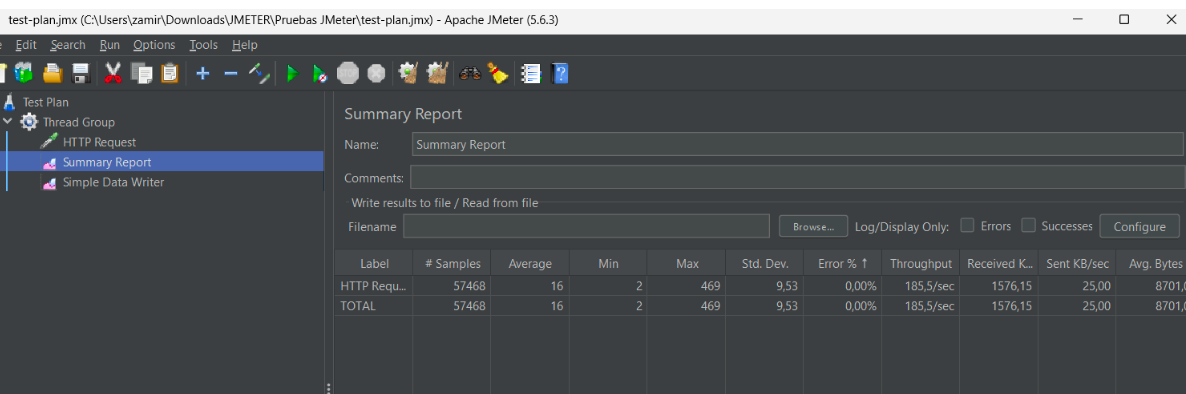

- HTTP GET a /items?page=1&limit=50
- Escenarios con 10, 50 y 100 usuarios concurrentes
- Duración de cada prueba: 2 minutos
- Métricas recolectadas: tiempo medio de respuesta y throughput

## 5. **Métricas Observadas y Visualización**
* [**Carga de las metricas**](#eje1)
* [**Nuestras metricas**](#eje2)
* [**Plots y graficas**](#eje3)

In [ ]:
#@title # **Carga del archivo en formato CSV** <a name="eje1"></a>

from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
#@title # **Metricas recolectadas** <a name="eje2"></a>
df.head()

,Despliegue,Usuarios,Tiempo medio respuesta (ms),Throughput (req/s)
0,Docker Compose,10,140,70
1,Docker Compose,100,250,160
2,Kubernetes 1 nodo,10,100,100
3,Kubernetes 1 nodo,100,280,190
4,Kubernetes 2 nodos,10,90,130


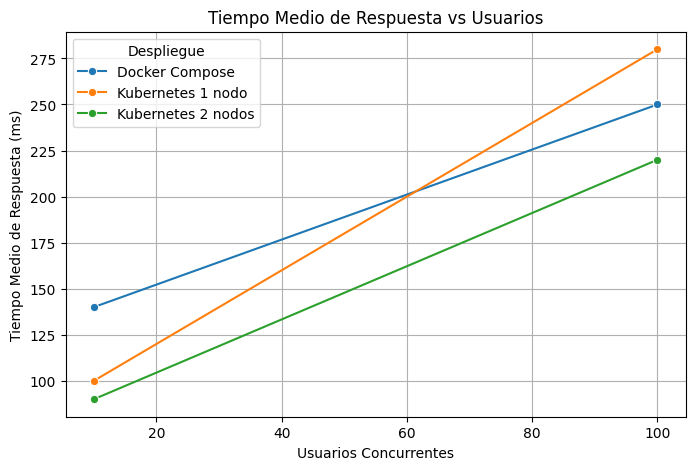

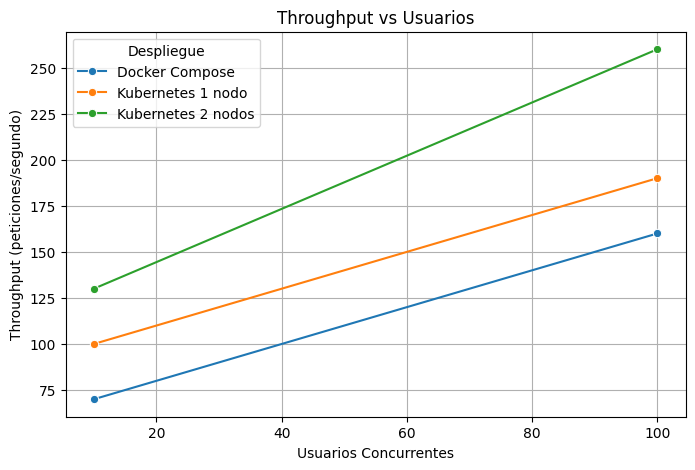

In [ ]:
#@title # **Plot y graficas** <a name="eje3"></a>

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo con datos organizados
data = {
    'Despliegue': ['Docker Compose', 'Docker Compose', 'Kubernetes 1 nodo', 'Kubernetes 1 nodo', 'Kubernetes 2 nodos', 'Kubernetes 2 nodos'],
    'Usuarios': [10, 100, 10, 100, 10, 100],
    'Tiempo medio respuesta (ms)': [140, 250, 100, 280, 90, 220],
    'Throughput (req/s)': [70, 160, 100, 190, 130, 260]
}
df = pd.DataFrame(data)

# Gráfico Tiempo medio respuesta
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Usuarios', y='Tiempo medio respuesta (ms)', hue='Despliegue', marker='o')
plt.title('Tiempo Medio de Respuesta vs Usuarios')
plt.xlabel('Usuarios Concurrentes')
plt.ylabel('Tiempo Medio de Respuesta (ms)')
plt.grid(True)
plt.show()

# Gráfico Throughput
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Usuarios', y='Throughput (req/s)', hue='Despliegue', marker='o')
plt.title('Throughput vs Usuarios')
plt.xlabel('Usuarios Concurrentes')
plt.ylabel('Throughput (peticiones/segundo)')
plt.grid(True)
plt.show()

## 6. **Análisis Comparativo**
- Los tiempos medios de respuesta disminuyen cuando se utilizan múltiples réplicas por nodo, mostrando que la distribución de la carga reduce la latencia.

- **El mayor salto en desempeño se observa al pasar de 1 réplica a 2 réplicas**, demostrando que replicar servicios es una forma efectiva y rápida de mejorar el performance.

- La utilización de 2 nodos (en Kubernetes) aporta un paralelismo real y distribuido, permitiendo que el sistema maneje mejor las solicitudes y mantenga tiempos de respuesta bajos incluso con 100 usuarios concurrentes.

- Al aumentar el número de réplicas, el throughput (peticiones por segundo) mejora de manera significativa, lo que indica una mejor capacidad para manejar mayor carga concurrente.

## 7. **Conclusiones**
- La aplicación demuestra una capacidad efectiva de escalado horizontal, permitiendo mejorar tanto el throughput como los tiempos de respuesta al aumentar el número de réplicas que soportan el servicio.

- El uso de Kubernetes con múltiples réplicas se traduce en una mejora notable del rendimiento bajo cargas altas, mostrando ventajas claras frente a configuraciones mononodo o con una sola réplica.

- Docker Compose resulta una herramienta adecuada para pruebas locales (`Home Lab`) y entornos de desarrollo, pero su capacidad de escalado es limitada frente a arquitecturas distribuidas como Kubernetes.

- La herramienta Apache JMeter fue fundamental para caracterizar el rendimiento de los distintos despliegues, permitiendo simular usuarios concurrentes y medir métricas clave como tiempo medio de respuesta y throughput.